In [39]:
import laspy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from colorspacious import cspace_converter
import matplotlib as mpl

file_name = "220829GO15D"
#change file name according to flight being analysed

base_dir = "C:/Hobbies/programming/data/"
#file_path = base_dir + file_name + '/' + file_name + "_C_A.las"
#use file_path below for multiple flights on one date and adjust carefully
file_path = "C:/Hobbies/programming/data/220829GO15D/22GOempty/" + file_name + "_EMPTY_C_A.las"



In [40]:
def read_las(filename):
    reader = laspy.open(filename)
    pts = reader.read_points(reader.header.point_count)
    points = pd.DataFrame({
        'x': np.array(pts.x), 
        'y': np.array(pts.y), 
        'z': np.array(pts.z)
    })
    return points


data_table = read_las(file_path)
data_table.to_csv(file_name + "_C_A.csv")


In [41]:
import tqdm
#use the line below if loading a previously saved .csv to avoid index troubles
data_table = pd.read_csv(file_name + "_C_A.csv", index_col = 0)

#SCALE is the value by which all the x and y values will be divided for the decimation
SCALE = 0.05

#divides the x and y values of each point by SCALE and keeps the value rounded down to a full intiger.
#This gives neighbouring points the same grid_x and grid_y values.
def grid_ID(): 
    grid_xs = []
    grid_ys = []
    for x,y,_ in tqdm.tqdm(data_table.values):
        grid_x = x//SCALE
        grid_y = y//SCALE
        grid_xs.append(grid_x)
        grid_ys.append(grid_y)
        #grid_ID = grid_x, grid_y
        #gris_IDs.append(grid_ID)
    data_table['grid_x']= grid_xs
    data_table['grid_y']= grid_ys
    
grid_ID()


#Creates a new .csv to continue transformations on and reassigns the variable data_table
#data_table.to_csv(file_name + "_C_grid_ID.csv")
#data_table = pd.read_csv(file_name + "_C_grid_ID.csv", index_col = 0)

#makes tables for each row with matching grid_x and grid_y and from each table picks out the lowest z. 
#Creates a new table with all those lowest z values.
min_z = data_table.groupby(['grid_x', 'grid_y'])['z'].min().reset_index()

min_z
        
    




100%|██████████████████████████████████████████████████████████████████| 10491830/10491830 [00:14<00:00, 720939.07it/s]


grid_x       grid_y        z
0        6199781.0  103242918.0  533.251
1        6199787.0  103242942.0  533.274
2        6199793.0  103242925.0  533.244
3        6199796.0  103242906.0  533.206
4        6199799.0  103242949.0  533.274
...            ...          ...      ...
3981398  6203744.0  103245944.0  519.479
3981399  6203749.0  103245927.0  525.873
3981400  6203752.0  103245936.0  531.791
3981401  6203752.0  103245953.0  519.615
3981402  6203758.0  103245938.0  519.668

[3981403 rows x 3 columns]

In [42]:
min_z[["x","y"]] = min_z[['grid_x', 'grid_y']] * SCALE

min_z.to_csv(file_name + "_C_A_decimated_"+ str(SCALE) +".csv")    

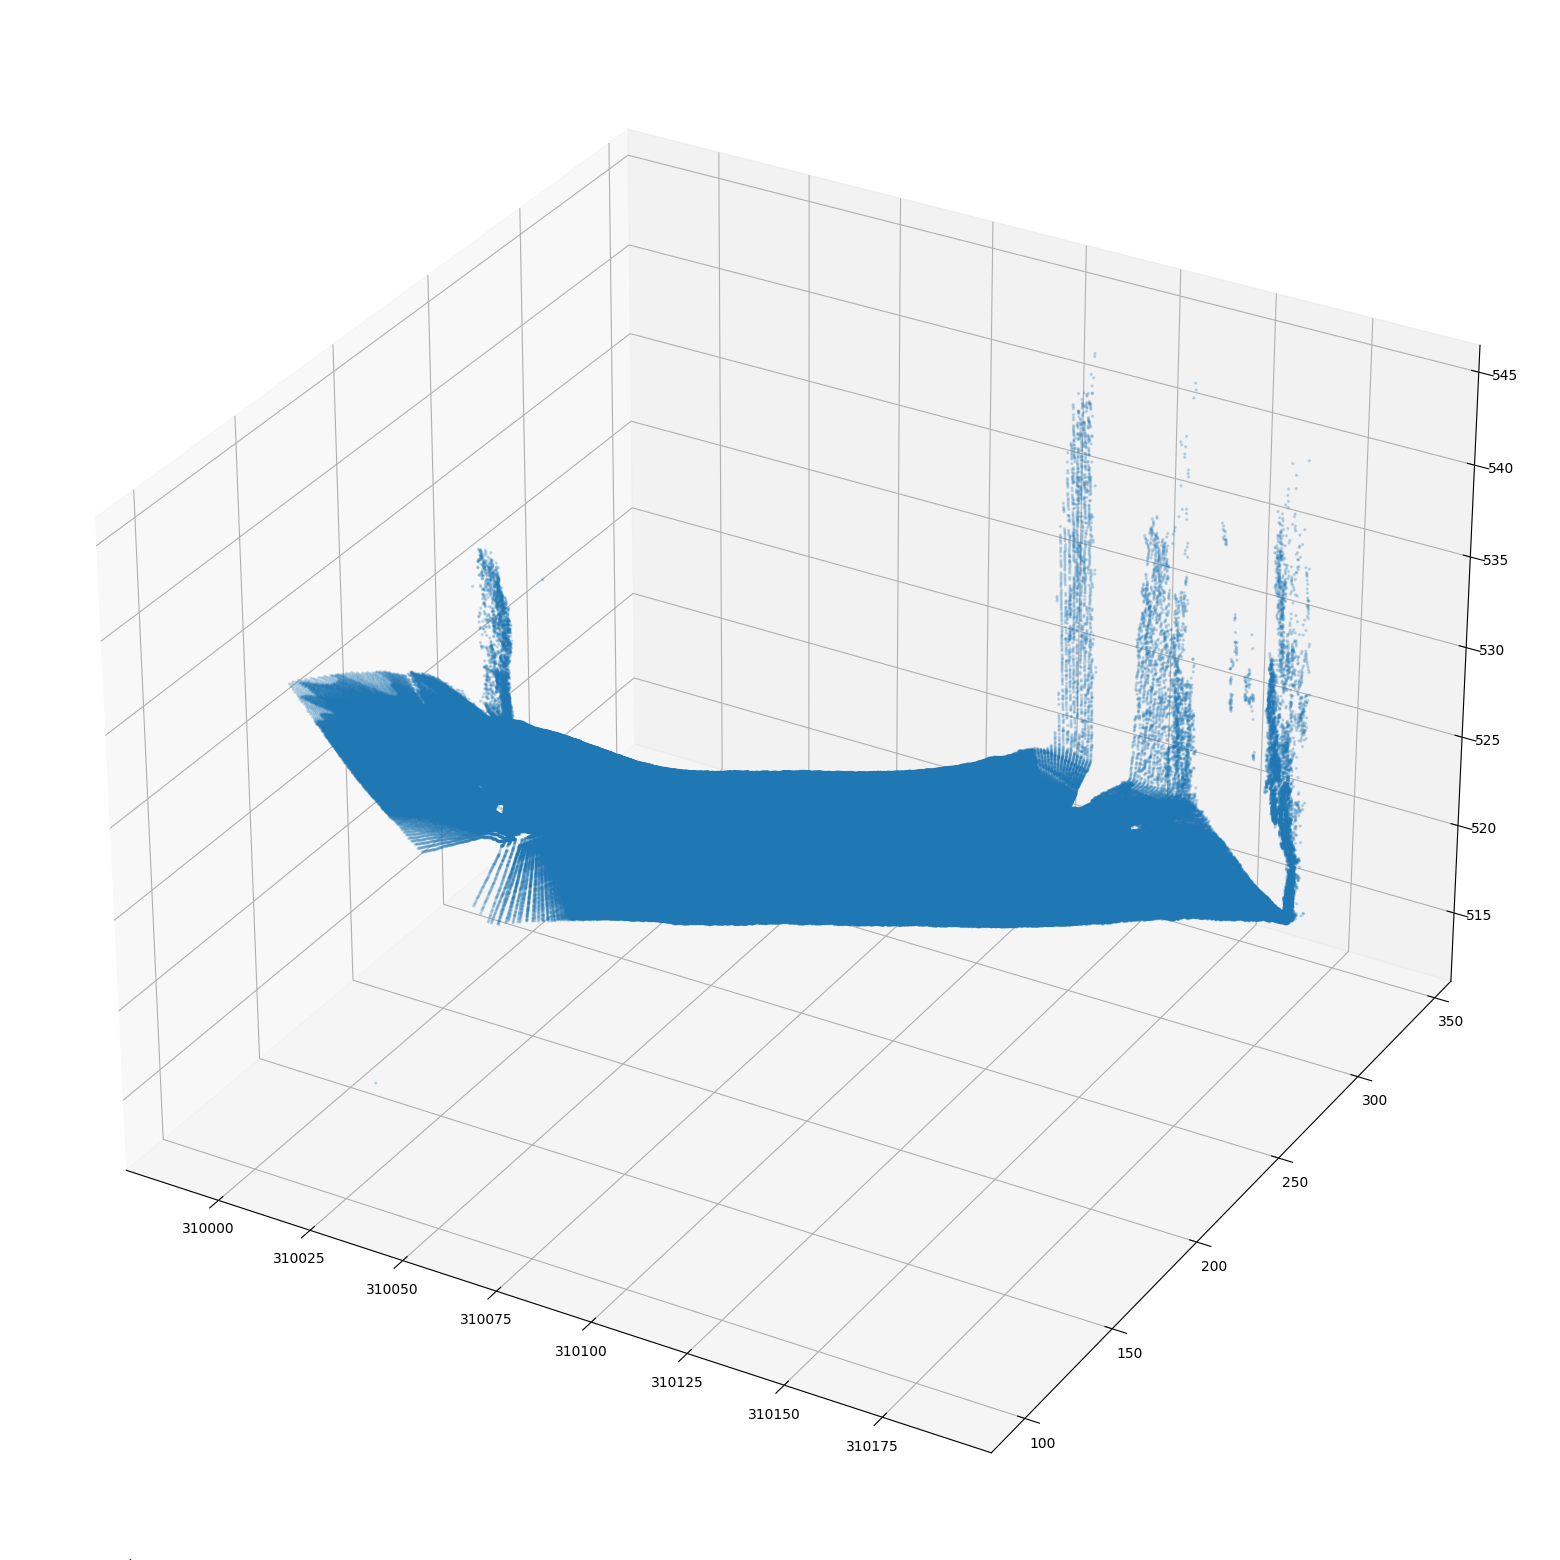

In [43]:


fig = plt.figure(figsize = (20, 20))
ax = fig.add_subplot(projection='3d')
#ax.scatter(data_table.x, data_table.y, data_table.z, s = 1, alpha = 0.2)
ax.scatter(min_z.x, min_z.y, min_z.z, s = 2, alpha = 0.2)




In [51]:
file_220829 = pd.read_csv("220829GO15D_EMPTY_C_A_decimated_0.05.csv")
file_220905 = pd.read_csv("220905GO15D_C_A_decimated_0.05.csv")
file_220912 = pd.read_csv("220912GO15D_C_A_decimated_0.05.csv")
file_221020 = pd.read_csv("221020GO60D_C_A_decimated_0.05.csv")
file_221101 = pd.read_csv("221101GO15D_C_A_decimated_0.05.csv")
file_221117 = pd.read_csv("221117GO15D_C_A_decimated_0.05.csv")
file_221128 = pd.read_csv("221128GO15D_C_A_decimated_0.05.csv")
file_230119 = pd.read_csv("230119GO15D_C_A_decimated_0.05.csv")




"""def range_z(file1, file2):

    file1_grid_x = []
    file1_grid_y = []
    file1_z = []
    file2_grid_x = []
    file2_gridy = []
    file2_z = []

    range_data = pd.DataFrame()
    
    for grid_x, grid_y, _, _, _ in file1.values:
        if file1.grid_x == file2.grid_x and file1.grid_y == file2.grid_y:
            file1_grid_x.append(file1.grid_x)
            file1_grid_y.append(file1.grid_y)
            file1_z.append(file1.z)
            file2_grid_x.append(file2.grid_x)
            file2_gridy.append(file2.grid_y)
            file2_z.append(file2.z)
            #range_data.append([file1.grid_x, file1.grid_y, file1.z], [file2.grid_x, file2.grid_y, file2.z])
    range_data[file1 + 'grid_x']=file1.grid_x
    range_data[file1 + 'grid_y']=file1.grid_y
    range_data[file1 + 'z']=file1.z
    range_data[file2 + 'grid_x']=file2.grid_x
    range_data[file2 + 'grid_y']=file2.grid_y
    range_data[file2 + 'z']=file2.z """
        
#range_z(file_220905, file_220912)
        
#range_data.to_csv("ranges.csv")        


ValueError: too many values to unpack (expected 5)

In [66]:
#seemingly unecessary

def intify_column(file1, column):
    file1[column] = np.int32(file1[column])

for file in [file_220829, file_220905, min_z]:
    for col in ['grid_x', 'grid_y']:
        intify_column(file, col)

In [48]:
#make the file with the difference in Z values per x and y grid ID

def file_difference(file1, file2):
    return file1.set_index(['grid_x', 'grid_y']).z - file2.set_index(['grid_x', 'grid_y']).z

zdiff = file_difference(file_220905, file_220912)
zdiff

grid_x     grid_y     
6200105.0  103243412.0   NaN
6200110.0  103243413.0   NaN
6200117.0  103243415.0   NaN
6200124.0  103243417.0   NaN
6200125.0  103243418.0   NaN
                          ..
6203513.0  103245964.0   NaN
6203515.0  103245982.0   NaN
6203522.0  103245976.0   NaN
6203523.0  103245985.0   NaN
6203529.0  103245987.0   NaN
Name: z, Length: 3752328, dtype: float64

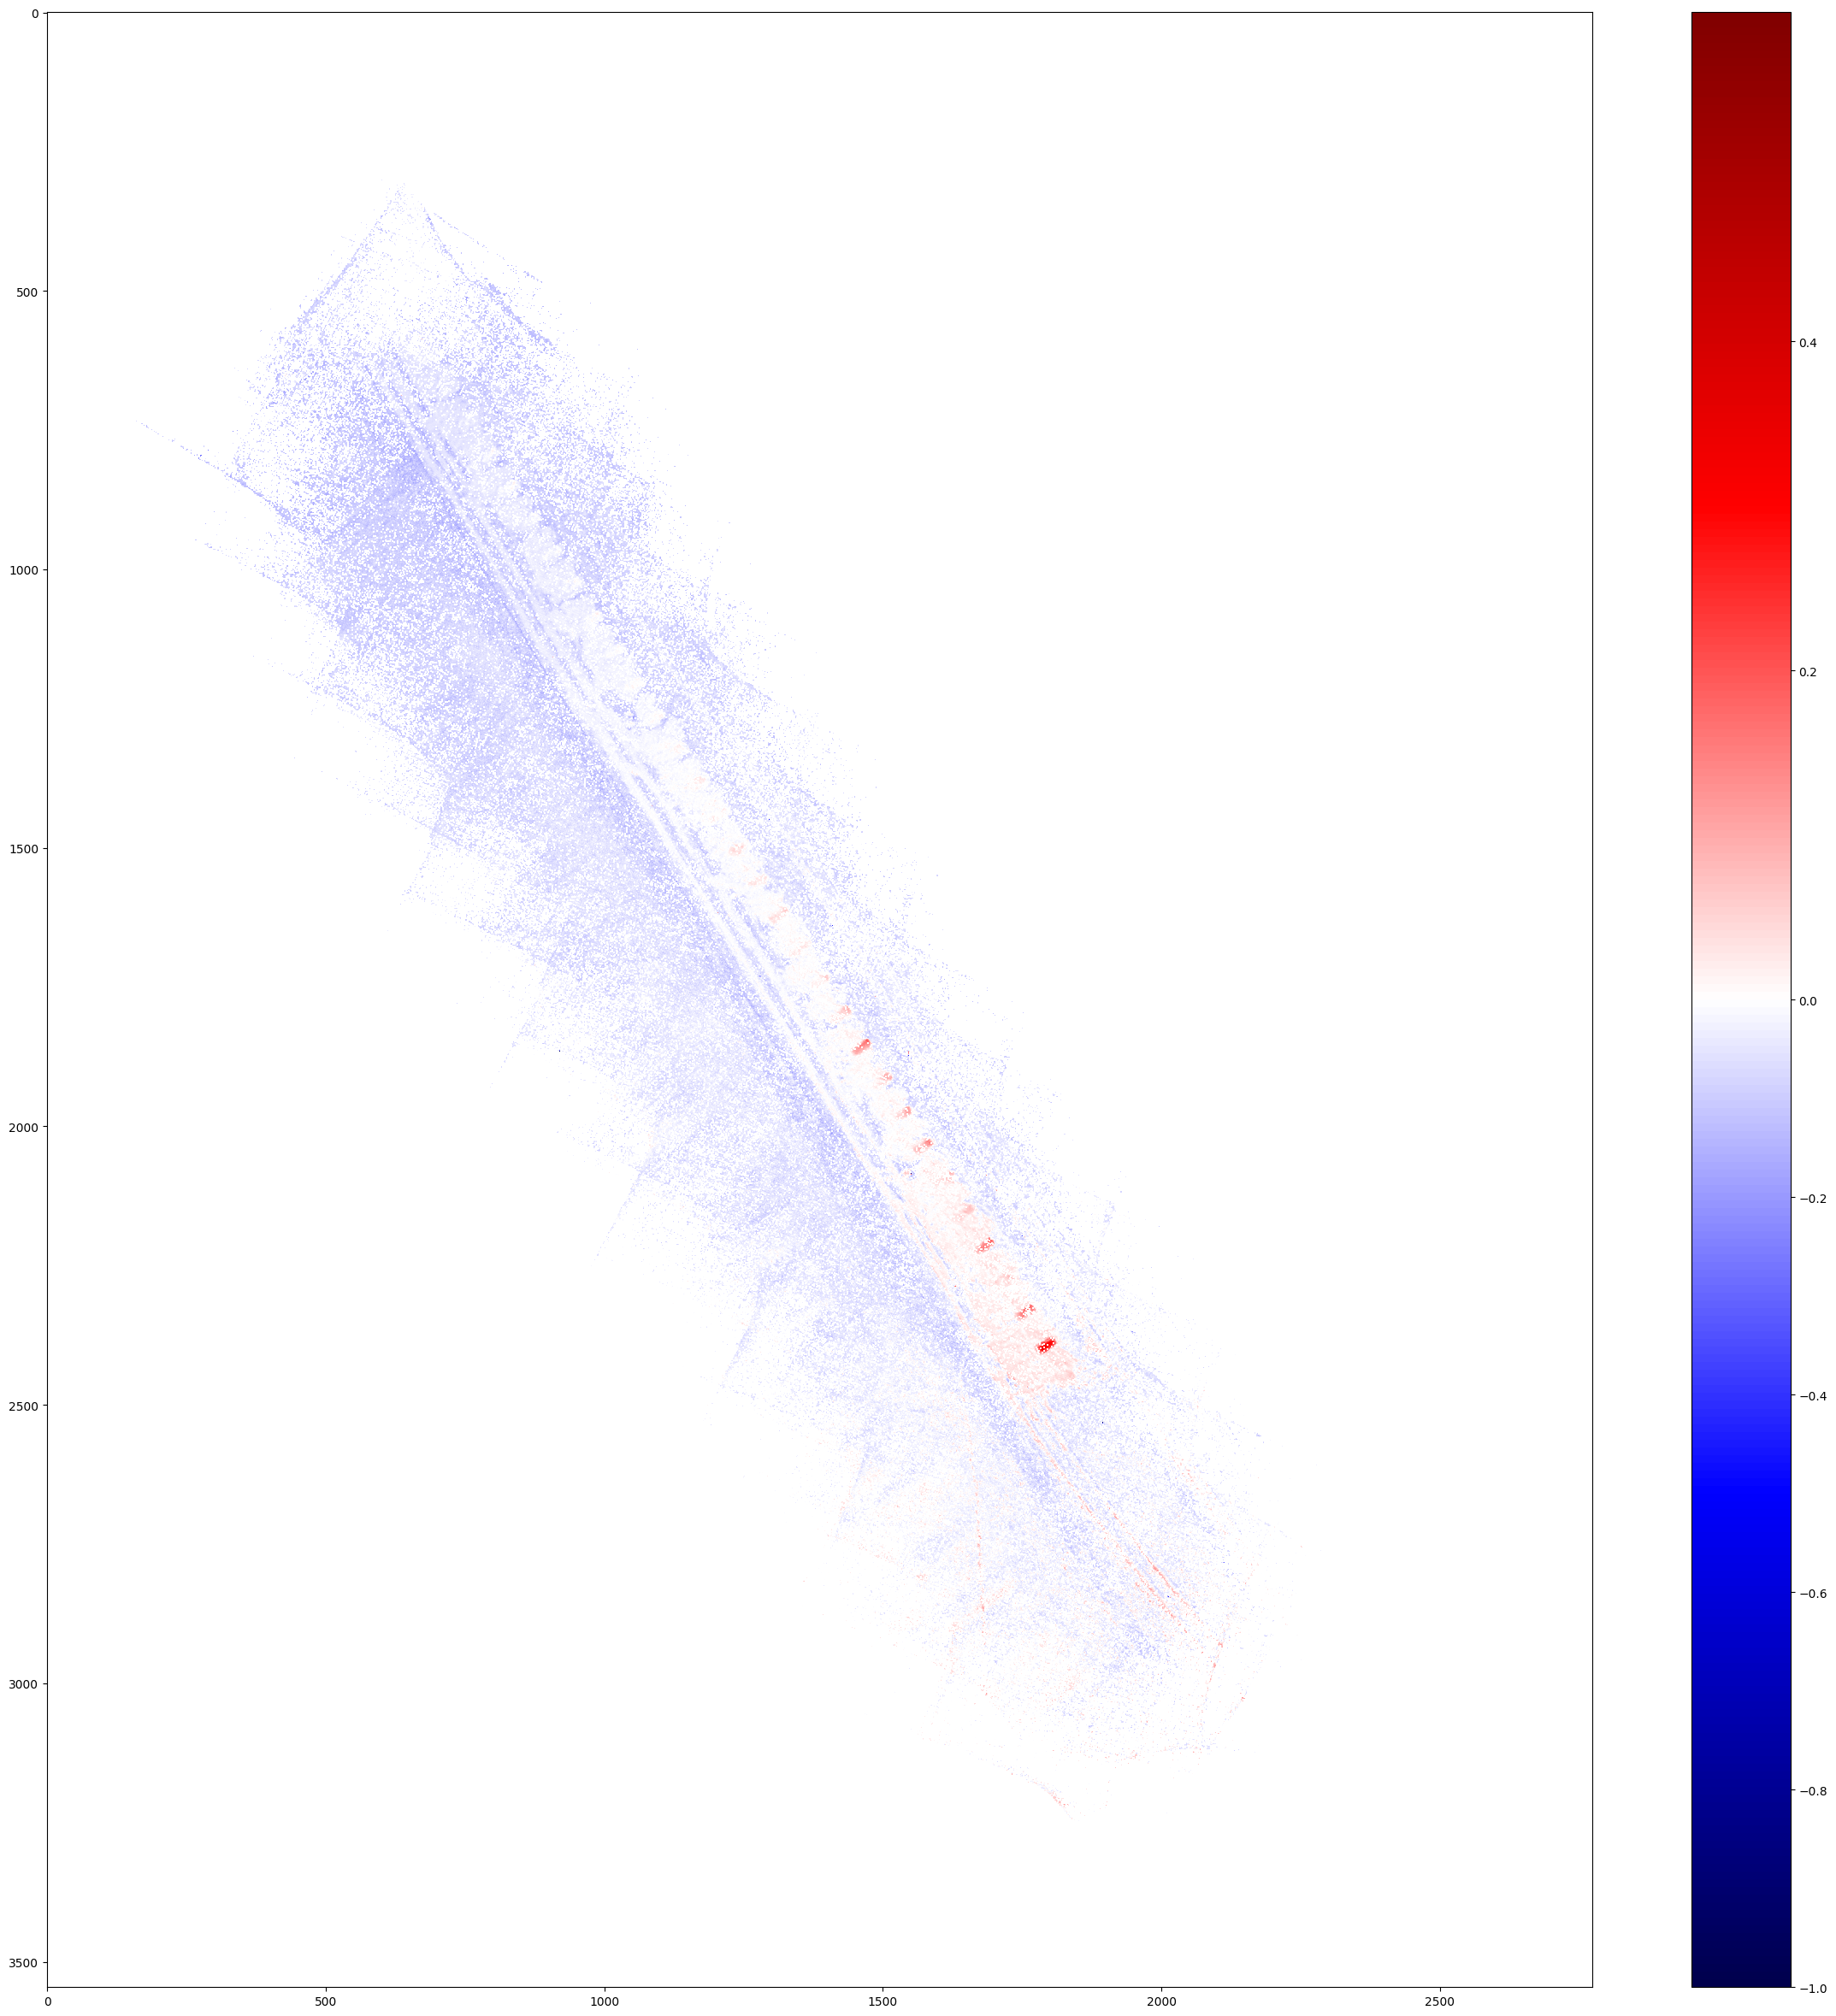

In [50]:
#z differences in about 1 week between 220905 and 220912 (decimated to 5cm squares)

def file_difference(file1, file2):
    return file1.set_index(['grid_x', 'grid_y']).z - file2.set_index(['grid_x', 'grid_y']).z

zdiff = file_difference(file_220905, file_220912)
zdiff


grid = zdiff.reset_index().pivot_table(columns='grid_x', index='grid_y', values='z')
plt.figure(figsize=(30, 30))
#grid.values[np.abs(grid.values) > 0.8] = np.nan
divnorm=colors.TwoSlopeNorm(vmin=-1, vcenter=0, vmax=0.6)

plt.imshow(grid.values, cmap = mpl.colormaps['seismic'], norm=divnorm)

plt.colorbar()

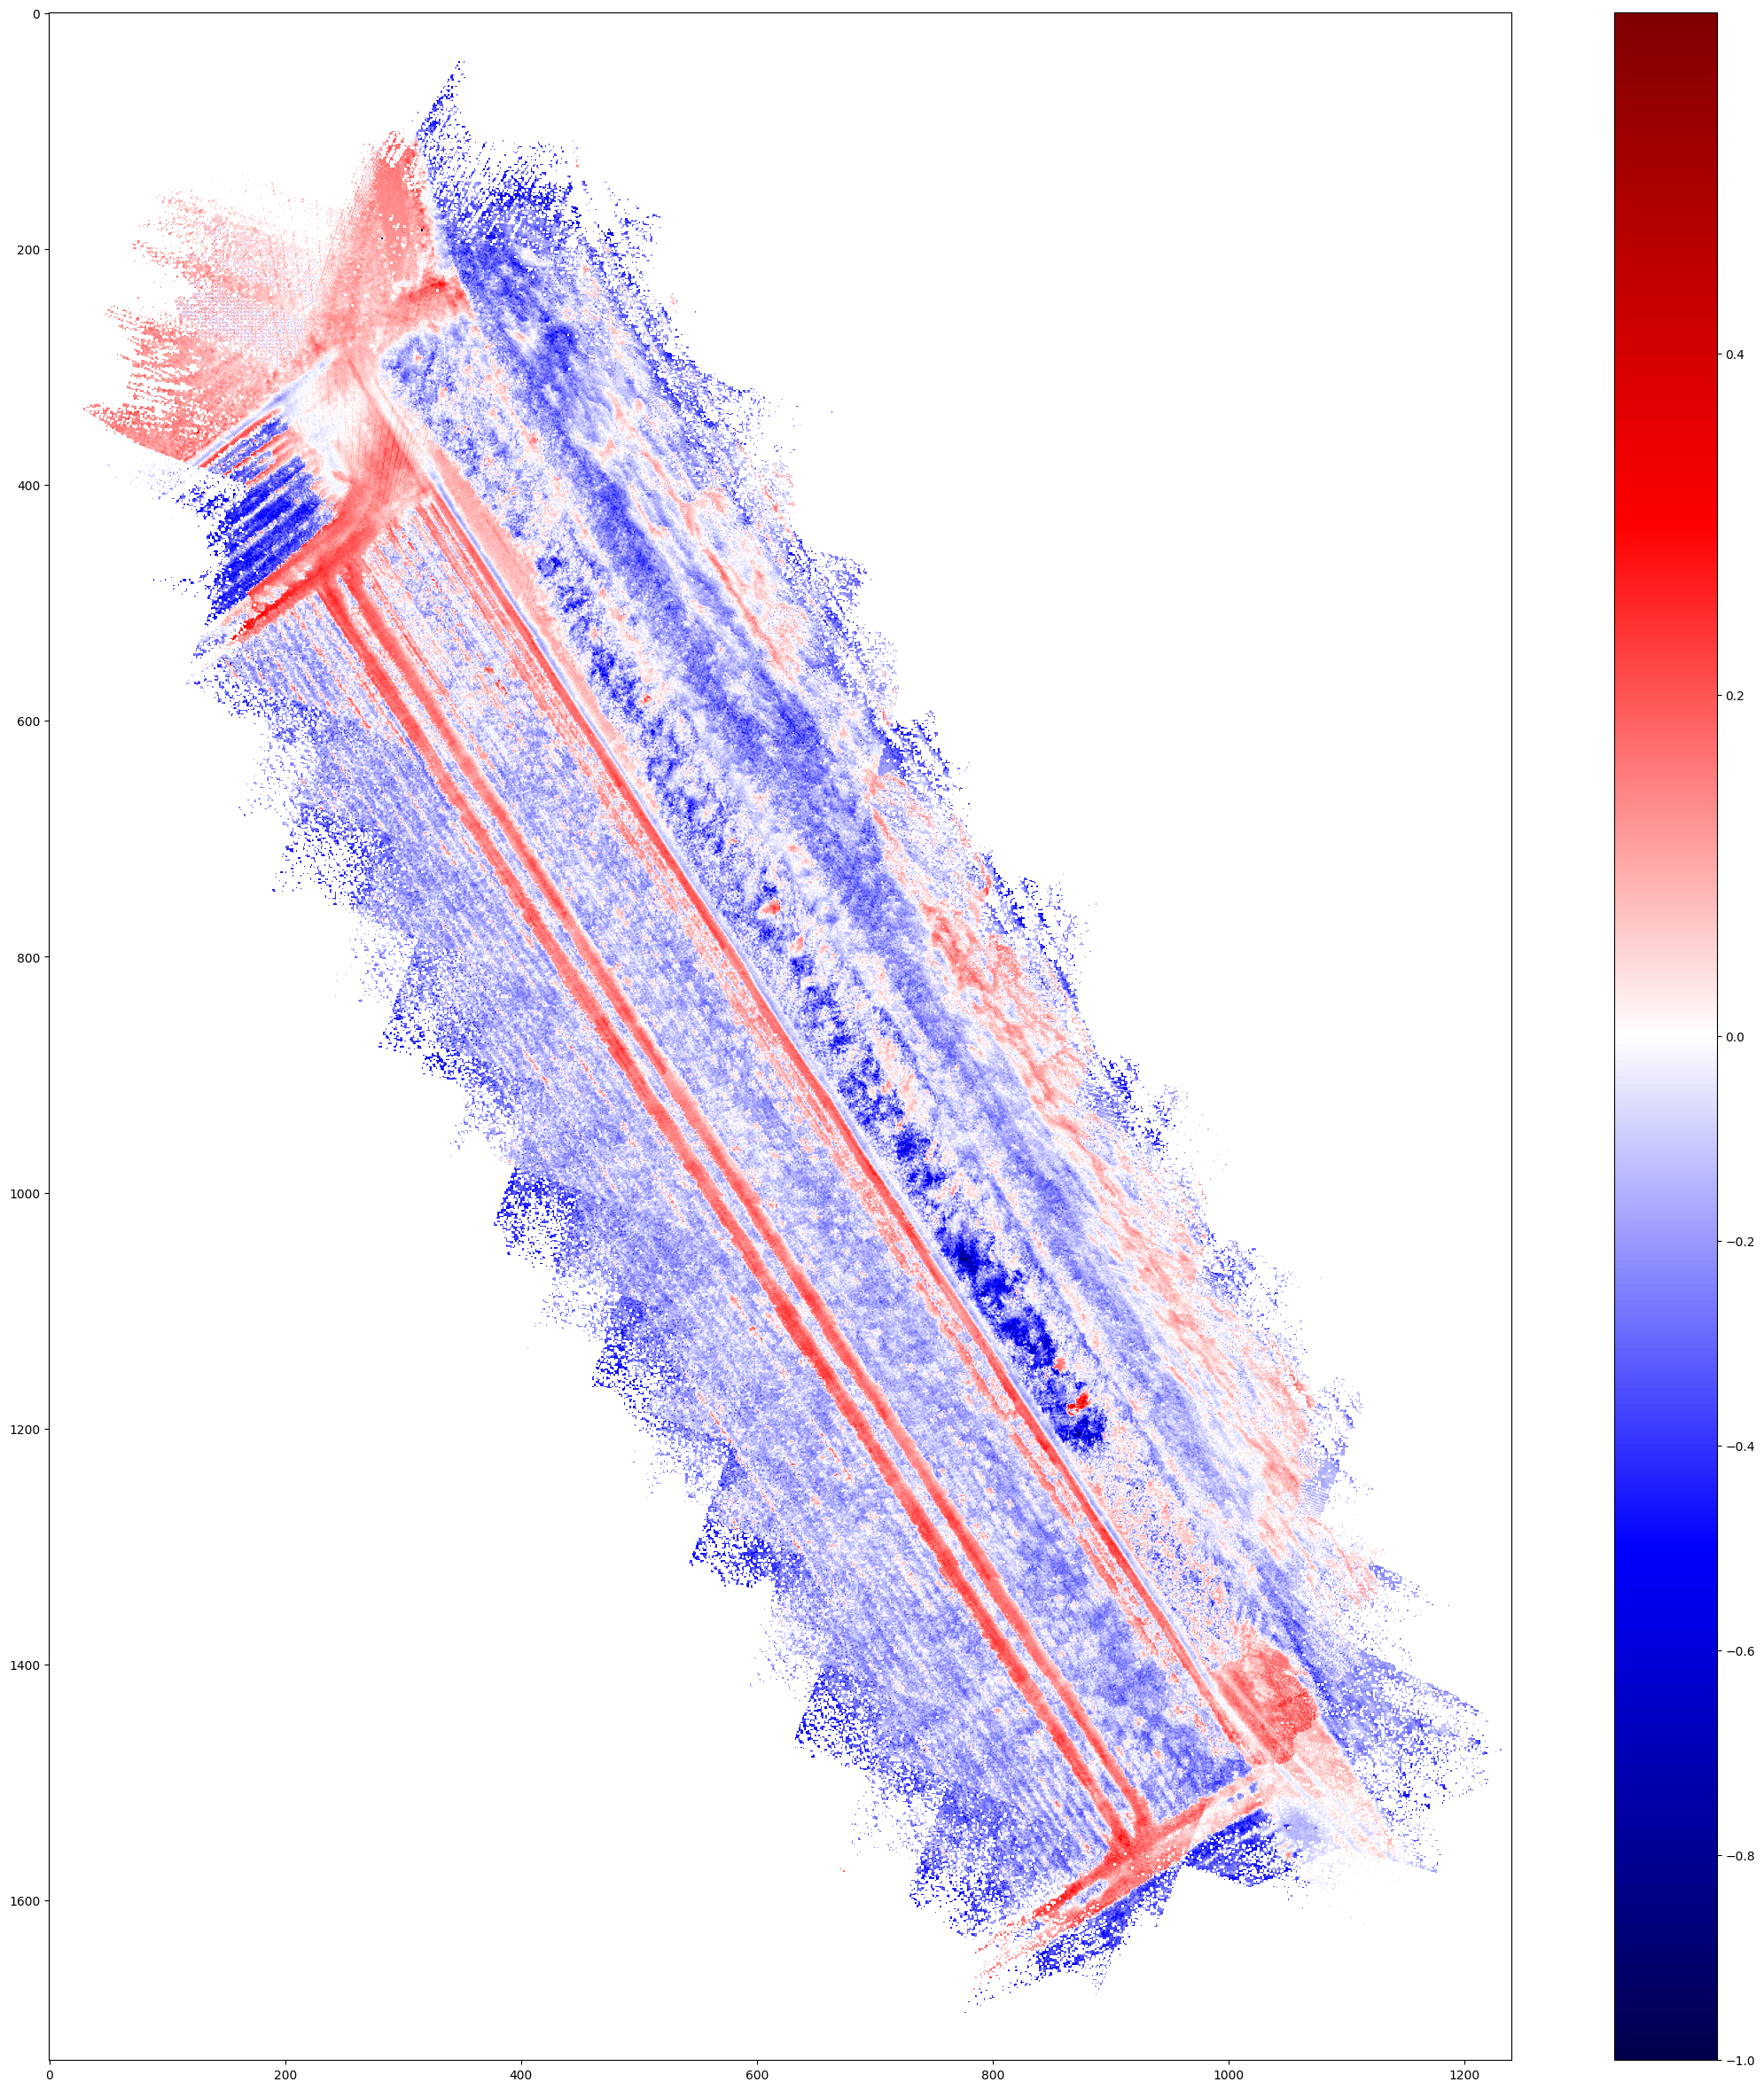

In [51]:
#z differences in about 10 months between 220905 and 230706 (decimated to 10cm squares)

def file_difference(file1, file2):
    return file1.set_index(['grid_x', 'grid_y']).z - file2.set_index(['grid_x', 'grid_y']).z

zdiff = file_difference(file_220905_10, file_230706_10)
zdiff

grid = zdiff.reset_index().pivot_table(columns='grid_x', index='grid_y', values='z')
plt.figure(figsize=(30, 30))
#grid.values[np.abs(grid.values) > 1.2] = np.nan
divnorm=colors.TwoSlopeNorm(vmin=-1, vcenter=0, vmax=0.6)
plt.imshow(grid.values, cmap = mpl.colormaps['seismic'], norm=divnorm)

plt.colorbar()

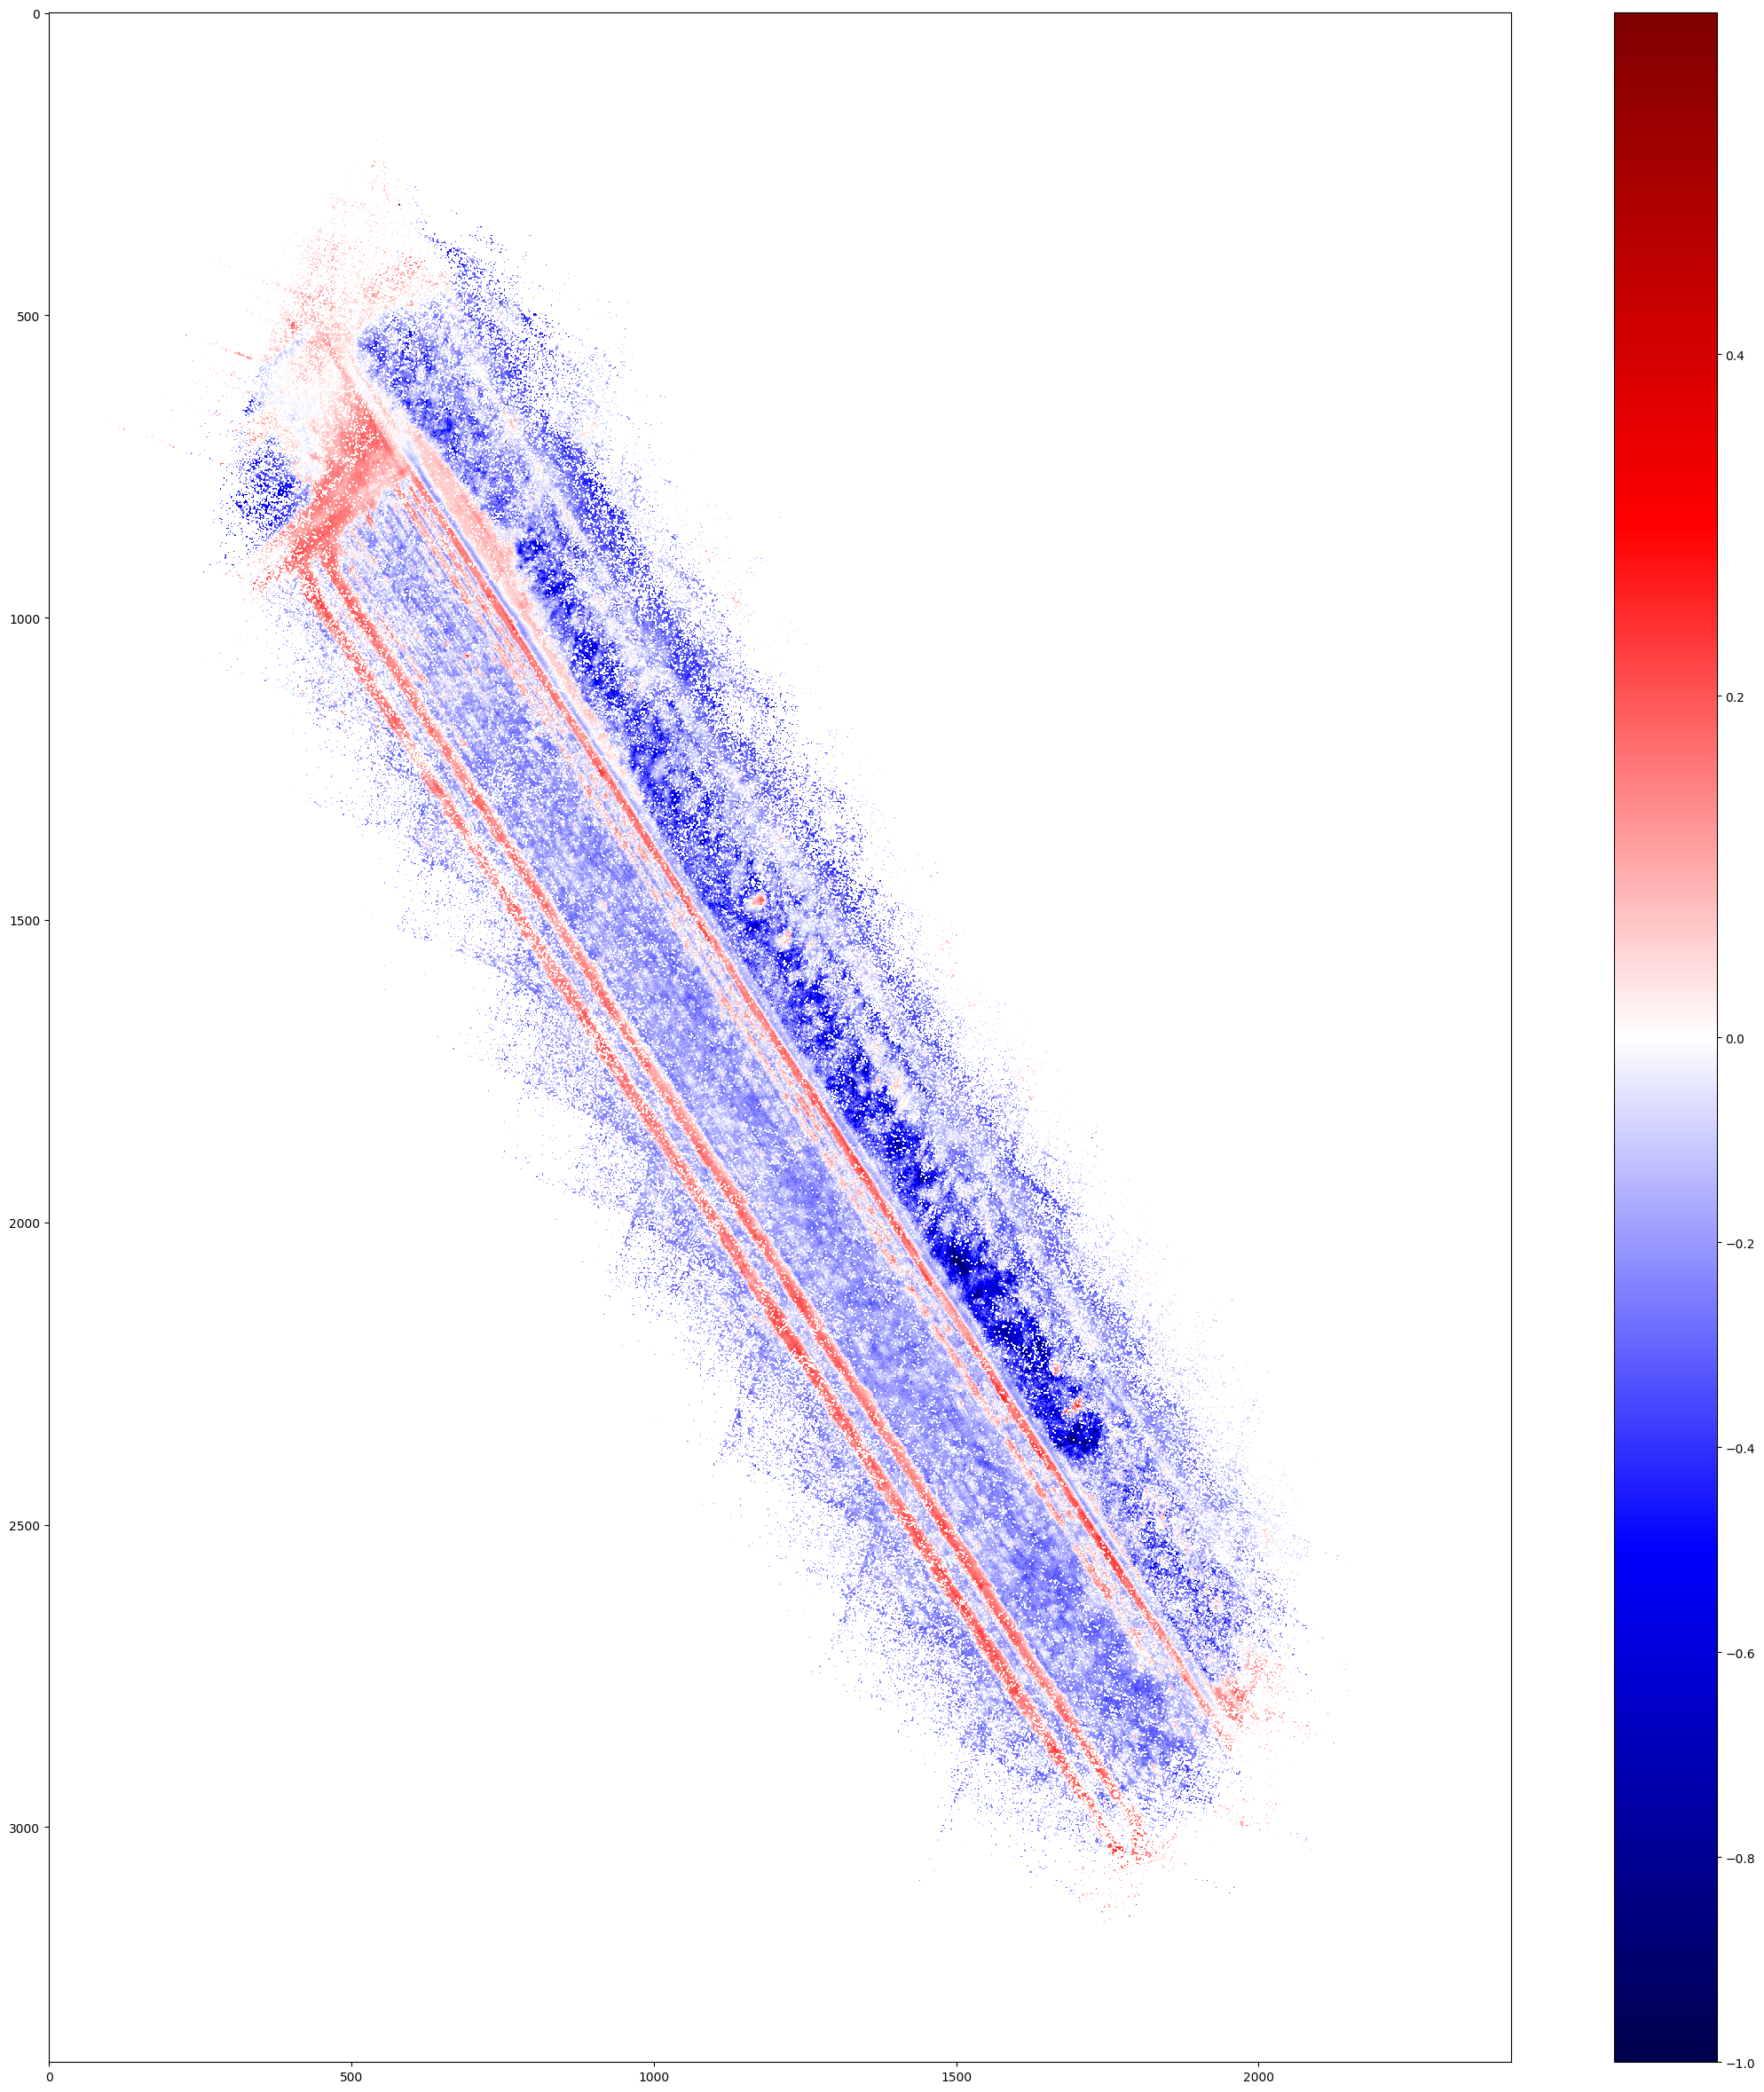

In [50]:
#z differences in about 10 months between 220905 and 230706 (decimated to 5cm squares)

def file_difference(file1, file2):
    return file1.set_index(['grid_x', 'grid_y']).z - file2.set_index(['grid_x', 'grid_y']).z

zdiff = file_difference(file_220905_05, file_230706_05)
zdiff

grid = zdiff.reset_index().pivot_table(columns='grid_x', index='grid_y', values='z')
plt.figure(figsize=(30, 30))
#grid.values[np.abs(grid.values) > 1.2] = np.nan
divnorm=colors.TwoSlopeNorm(vmin=-1, vcenter=0, vmax=0.6)
plt.imshow(grid.values, cmap = mpl.colormaps['seismic'], norm=divnorm)

plt.colorbar()

In [ ]:
#z differences in about 2 weeks between 220905 and 220921

def file_difference(file1, file2):
    return file1.set_index(['grid_x', 'grid_y']).z - file2.set_index(['grid_x', 'grid_y']).z

zdiff = file_difference(file_220905_05, file_220921)
zdiff



grid = zdiff.reset_index().pivot_table(columns='grid_x', index='grid_y', values='z')
plt.figure(figsize=(30, 30))
#grid.values[np.abs(grid.values) > 0.6] = np.nan
divnorm=colors.TwoSlopeNorm(vmin=-0.5, vcenter=0, vmax=0.5)
plt.imshow(grid.values, cmap = mpl.colormaps['seismic'], norm=divnorm)

plt.colorbar()

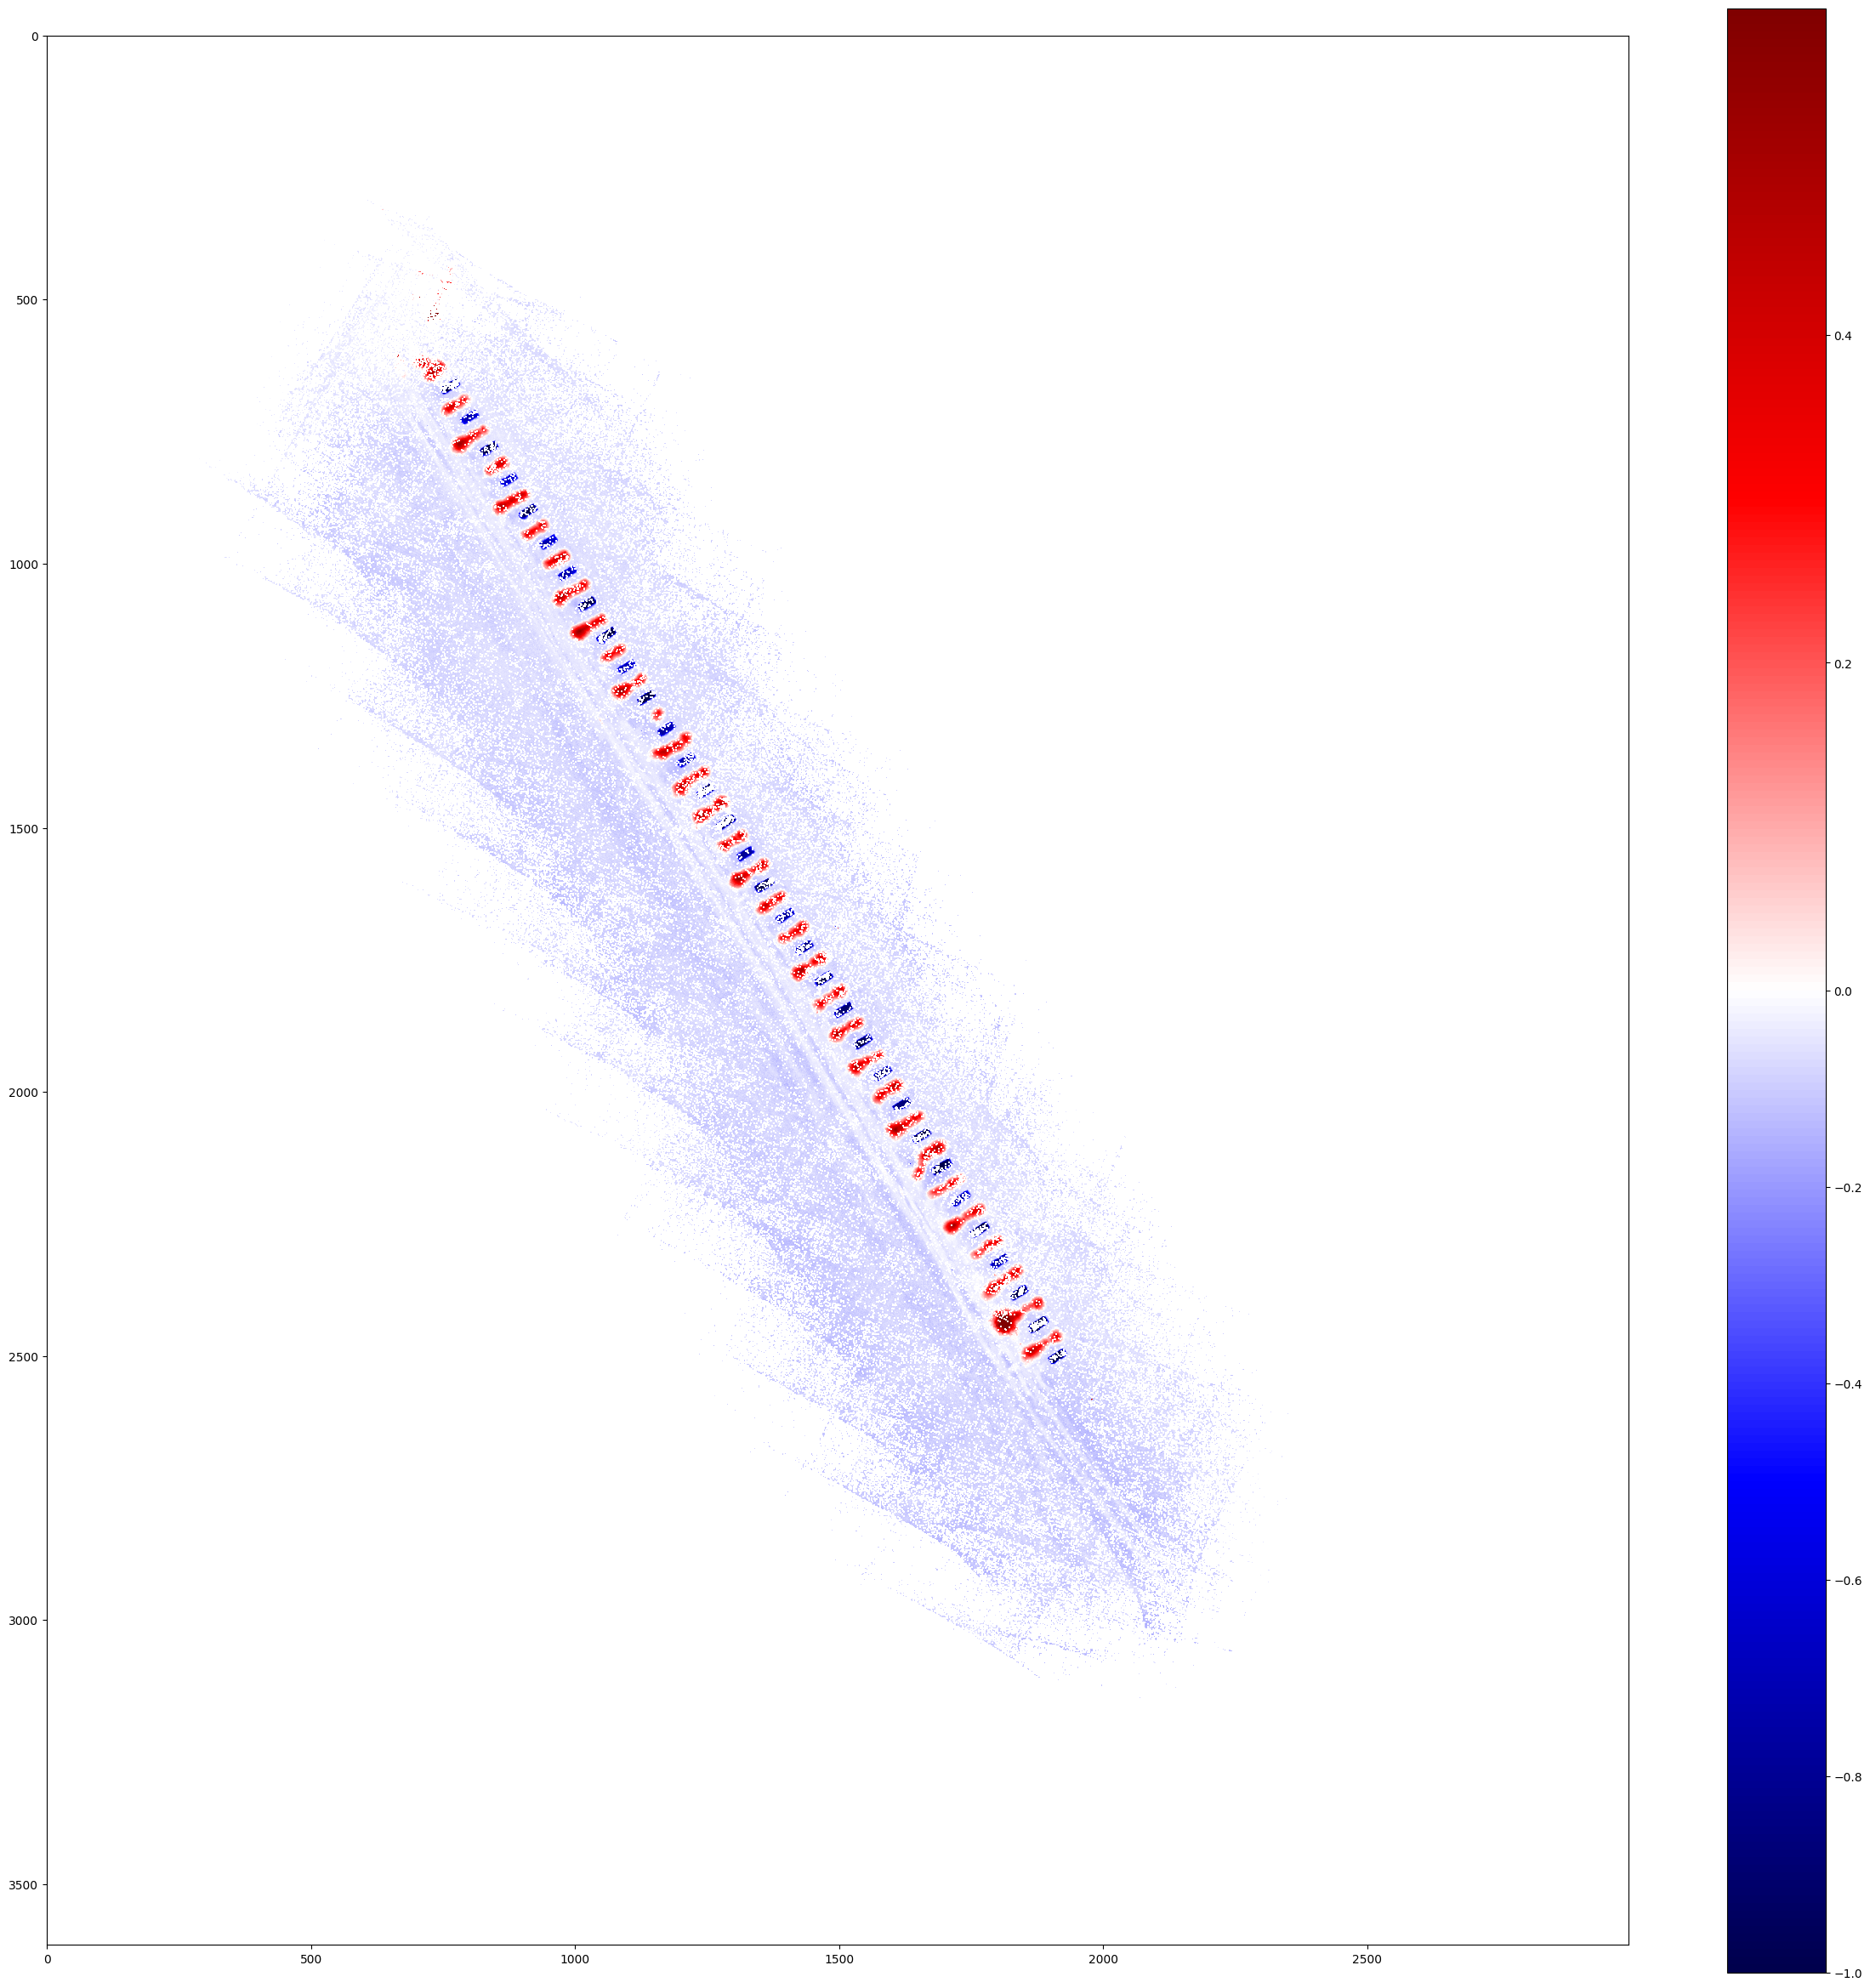

In [4]:
##z differences in about 2 weeks between 220829 (burial day, open and empty graves) and 220905

def file_difference(file1, file2):
    return file1.set_index(['grid_x', 'grid_y']).z - file2.set_index(['grid_x', 'grid_y']).z

zdiff = file_difference(file_220829, file_220905_05)
zdiff



grid = zdiff.reset_index().pivot_table(columns='grid_x', index='grid_y', values='z')
plt.figure(figsize=(30, 30))
#grid.values[np.abs(grid.values) > 2.3] = np.nan
divnorm=colors.TwoSlopeNorm(vmin=-1, vcenter=0, vmax=0.6)
plt.imshow(grid.values, cmap = mpl.colormaps['seismic'], norm=divnorm)

plt.colorbar()

#plt.savefigure('220829_to_220905.png')

In [2]:
def heatmap(grid_table):
    grid = grid_table.reset_index().pivot_table(columns='grid_x', index='grid_y', values='z')
    plt.imshow(grid.values)

In [60]:
np.isnan(file_220829).any()

Unnamed: 0    False
grid_x        False
grid_y        False
z             False
x             False
y             False
dtype: bool